<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    Compiling and Fitting Neural Network Regression Model
</div>

In [1]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# 
#
# ==========================================================
# Lesson: Model Specification for Neural Network with Keras 
#         API Implementation
# ==========================================================
# ## Learning Objectives
# This guide will enable you to:
# 1. Compile a nnet model
# 2. fit regression model
# 3. understand the fitting output
# =======================================================================
#.          Copyright © Dr. Saad Laouadi 2024
# =======================================================================

In [2]:
# 1. Environment Setup
# ------------------
import os  
from pathlib import Path
from pprint import pprint                     # This will be used for printing dicts in a nicer format
# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"   # if you have GPU

# Import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from layers import the Input and Dense
from tensorflow.keras.layers import Input, Dense

# Import the Sequential Model
from tensorflow.keras.models import Sequential

print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

# Configuration
DATA_PATH = Path("../../datasets/regression/wages.csv").resolve()

Author: Dr. Saad Laouadi

Last updated: 2024-12-07

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
matplotlib: 3.9.2
pandas    : 2.2.2
keras     : 3.6.0
numpy     : 1.26.4



## Objectives

1. Import necessary tools
2. Read data
3. build Neural Network model architecture
   - Set the input
   - Set the hidden layers
   - set the output layer
   - Understand the model componens
4. Compile the model
    - Choose the optimizer
    - Choose the loss function
5. Fit the model
    - Train the model using the data
    - Understand the output

In [3]:
# Read the data using pandas 
data = pd.read_csv(DATA_PATH)

# Check the Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [4]:
# Create a function that sets up the model architecture
def create_wage_model(n_features: int) -> Sequential:
    """
    Create a sequential model for wage prediction.

    Parameters
    ----------
    n_features : int
        The number of features in the input data.

    Returns
    -------
    model : Sequential
        The compiled Sequential model.
    """
    # Instantiate the sequential model
    model = Sequential(name="WageModel")
    
    # Add the input layer
    model.add(Input(shape=(n_features, )))
    
    # Add a fully connected layer with 64 hidden nodes and relu activation function
    model.add(Dense(units=64, activation="relu"))
    
    # Add the second layer with 32 nodes
    model.add(Dense(units=32, activation="relu"))
    
    # Add the output layer
    model.add(Dense(units=1))
    
    # Return the model
    return model

## Compiling the model

- Now it is time to compile the specified model. To compile the model we need to Specify:
    1. The optimizer
    2. The loss function to use. 
    
> **Note**
>> Adam optimizer is an excellent choice to start with.
>> You can read more about it as well as other Keras optimizers [here](https://keras.io/api/optimizers/)
>> You can read the [original paper](https://arxiv.org/abs/1412.6980v8) that introduced the Adam optimizer.

In [5]:
# Create the model 
model = create_wage_model(data.shape[1]-1)

# Check the model summary
print(model.summary())

Model: "WageModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

In [7]:
# Verify that model contains information from compiling
print("Loss function: " + model.loss)
print("The optimizer: ", model.optimizer)
print("The model layer: ", model.layers)
print("The model number of layers: ", len(model.layers))
print(model.metrics_names)

Loss function: mean_squared_error
The optimizer:  <keras.src.optimizers.adam.Adam object at 0x30d24c5d0>
The model layer:  [<Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
The model number of layers:  3
['loss']


## Fitting the model

This is actually where you pass the data and train or fit the model.  

In [8]:
# set the target variable
target = data['wage_per_hour'].values

# chech the shape
print(target.shape)

# Set the predictors
predictors = data.drop(columns='wage_per_hour').values

# Check the shape
print(predictors.shape)

(534,)
(534, 9)


In [9]:
# Fit the model
model.fit(
    x = predictors,
    y = target,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 92.5900
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.8556
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.6731
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.2061
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.8653


### Monitoring Model Training

You can actually monitor the model training process by saving the fitting process in an object usually named `history`.

In [10]:
# Create the model 
model = create_wage_model(data.shape[1]-1)

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')


# fit the model with 150 epochs
history = model.fit(
    x = predictors,
    y = target,
    epochs = 150,
    verbose = 0
)

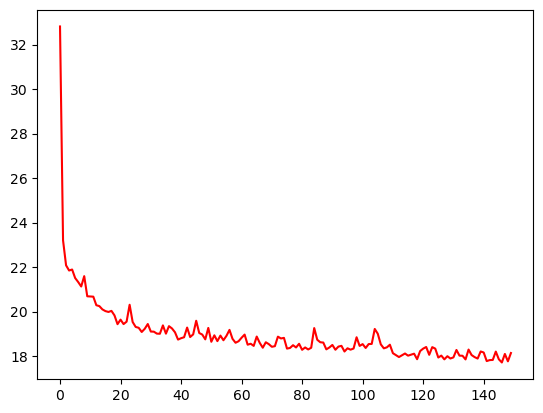

In [11]:
# Plot the loss metric
plt.plot(history.history['loss'], color = "red")
plt.show()